
# Machine Learning CM 2604 
## Individual Coursework

**RGU ID:** 2330950

**IIT ID:** 20231631

**Name:** Stephan Nelishka Dabare


**Introduction:**

In this project, I perform a simple classification problem using two machine learning models: a neural network and random forest classification. The objective is to predict whether a client will subscribe to a term deposit. The dataset used for this analysis is the Bank Marketing dataset, which is taken from the UCL Machine Learning Repository.

**Source:** https://archive.ics.uci.edu/dataset/222/bank%2Bmarketing

**About the dataset:**

The data related to marketing campaigns conducted by a Portuguese banking institution. This campaign was based on phone calls, and often required multiple contacts with the same client to determine whether they would subscribe to a term deposit, with a response of either 'yes' or 'no.' There are 4 datasets in that repository. I choose the `bank-full.csv` dataset. `bank-full.csv` contains all examples ordered by date.

**Objective:**

The objective is to predict if the client will subscribe a term deposit using neural network and random forest classification.

### 1. Understanding the dataset

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.font_manager import weight_dict
from tensorflow.python.ops.numpy_ops.np_dtypes import int64
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
# Get the dataset
data_frame = pd.read_csv('bank-full.csv', sep=';')

#### 1.1. Preview the dataset:

In [4]:
# get first 5 rows
data_frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### 1.2. Get the shape of the dataset:

In [5]:
# Print the number of rows and columns
data_frame.shape

(45211, 17)

**Dataset has:**
* 45211 rows
* 17 columns

#### 1.3. Get summary of the dataset: 

In [6]:
# Get summary of the dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### 1.4. About numerical column data:

In [7]:
# Get summary of numerical columns
data_frame.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### 1.5. About categorical column data:

In [8]:
num = 1
# Iterate through the categorical columns
for column in data_frame.select_dtypes(include='object').columns:
    # Print the categories in each column
    print(str(num) + " " + column + " --> " + str(data_frame[column].unique()))
    num += 1

1 job --> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
2 marital --> ['married' 'single' 'divorced']
3 education --> ['tertiary' 'secondary' 'unknown' 'primary']
4 default --> ['no' 'yes']
5 housing --> ['yes' 'no']
6 loan --> ['no' 'yes']
7 contact --> ['unknown' 'cellular' 'telephone']
8 month --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
9 poutcome --> ['unknown' 'failure' 'other' 'success']
10 y --> ['no' 'yes']


**Categorical columns:**
* Nominal:

`job`,`marital`,`education`,`contact`,`month`,`poutcome`

* Binary:

`default`,`housing`,`loan`,`y`

### 2. About Attributes

#### Input variables:

1. `age` : Age of the client (numeric)
2. `job` : Job of client (categorical)
3. `marital` : Marital status (categorical)
4. `education` : Education level (categorical)
5. `default` : Client has credit in default? (categorical)
6. `balance` : Average yearly balance, in euros (numeric)
7. `housing` : Client has housing loan? (categorical)
8. `loan` : Client has personal loan? (categorical)
9. `contact` : Contact communication type with client (categorical)
10. `day` : Last contact day of the month (numeric)
11. `month` : Last contact month (categorical)
12. `duration` : Last contact duration, in seconds (numeric)
13. `campaign` : Number of contacts performed before during this campaign (numeric)
14. `pdays` : Number of days since the client was last contacted (numeric)
15. `previous` : Number of contacts performed before this campaign (numeric)
16. `poutcome` : Outcome of the previous campaign (categorical)

#### Output variable:

17. `y` : Client subscribed a term deposit? (binary: 'yes', 'no')

**Make separate dataframes for numerical and categorical columns**

In [9]:
# Get numerical columns
numerical_columns = data_frame.select_dtypes(include='int64').columns

# Get categorical columns
categorical_columns = data_frame.select_dtypes(include='object').columns

### 3. Exploratory Data Analysis (EDA)

#### 3.1. Select the correct columns

* Select all columns except the last column
* The last column --> target column
* For the entire project all columns are selected, no need to remove.

#### 3.2. Search for missing values

In [10]:
# Handle missing values
missing_value_col = []

# Check each column for missing values
for column in data_frame.columns:
    # If the column has any missing values, add to the list
    if data_frame[column].isnull().sum() > 0:
        missing_value_col.append(column)

    
# If no missing values are found
if not missing_value_col:
    print("No missing value found")
else:
    print("Missing values found in columns: ", missing_value_col)

No missing value found


* No missing values found

#### 3.3. Find the features with one value

In [11]:
# Iterate through all columns
for column in categorical_columns:
    # If a column has only one unique value
    print(column,data_frame[column].nunique())

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


* There are no single value columns

#### 3.4. Search for duplicate rows

In [12]:
# Check for duplicate rows
print(f"Duplicate rows: {data_frame.duplicated().sum()}")

Duplicate rows: 0


* There are no duplicate rows

#### 3.5. Explore the numerical columns

#### 3.5.1. Search for discrete numerical columns

In [13]:
# Identify discrete numerical columns
discrete_numerical_columns = []

# Iterate through numerical columns
for column in numerical_columns:
    unique_values = data_frame[column].nunique()
    if unique_values < 20:
        discrete_numerical_columns.append(column)
        print(f"{column} has {unique_values} unique values")

# Print the list of discrete numerical columns
print("Discrete numerical columns:", discrete_numerical_columns)


Discrete numerical columns: []


* No discrete columns found

#### 3.5.2. Search for continuous numerical columns

In [14]:
# Identify continuous numerical columns
continuous_columns = []

# Iterate through numerical columns
for column in numerical_columns:
    unique_values = data_frame[column].nunique()
    if unique_values >= 20:
        continuous_columns.append(column)
        print(f"{column} --> {unique_values} unique values")

age --> 77 unique values
balance --> 7168 unique values
day --> 31 unique values
duration --> 1573 unique values
campaign --> 48 unique values
pdays --> 559 unique values
previous --> 41 unique values


#### 3.5.3. Distribution of numerical columns

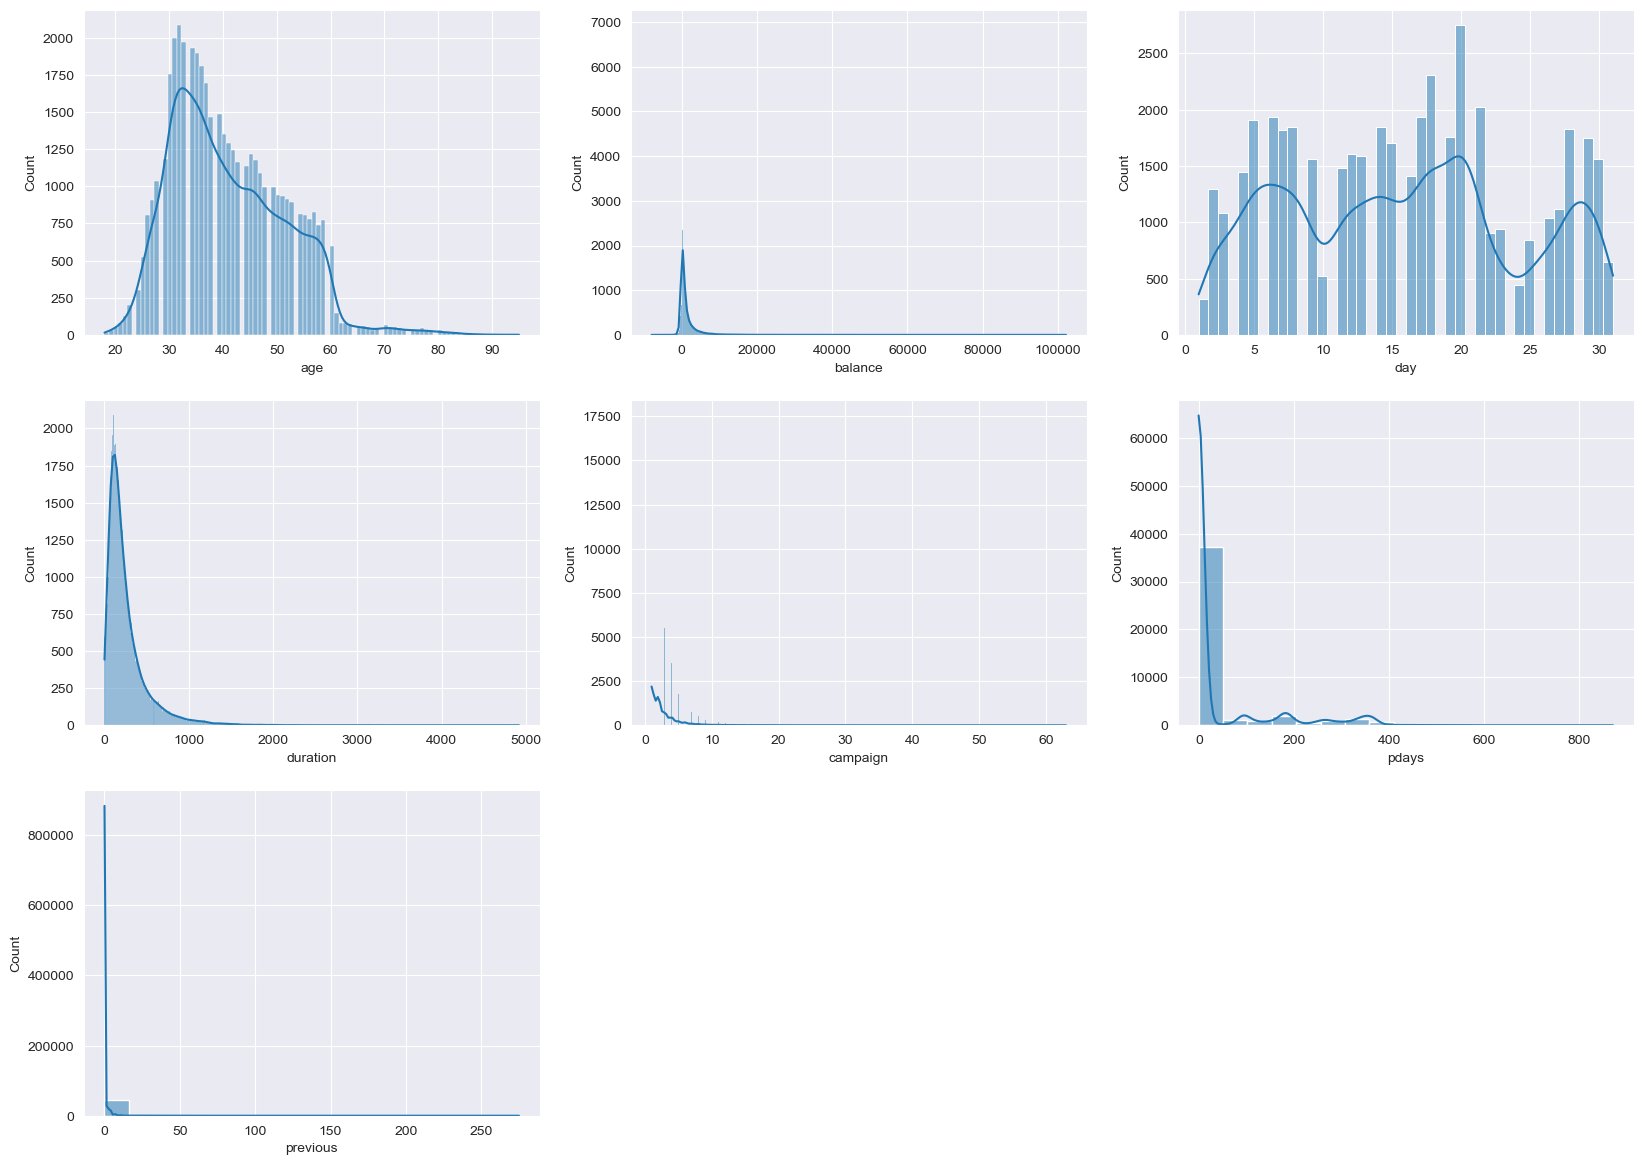

In [15]:
# Plot the distribution of numerical columns
plt.figure(figsize=(20,60), facecolor='white')
plot_number = 1

# Loop through each numerical column
for column in continuous_columns:
    ax = plt.subplot(12,3,plot_number)
    sns.histplot(data_frame[column], kde=True)
    plt.xlabel(column)
    plot_number += 1
plt.show()

**According to the plots:**
* `age`, `day` is normally distributed.
* `balance`, `duration`, `campaign`, `pdays`, `previous` are left skewed.
* There should be some outliers.

#### 3.6. Get the correlation between numerical columns

**Correlation of all numerical data and target variable**
* With `y` column shows how the numerical columns are correlated with the target variable.

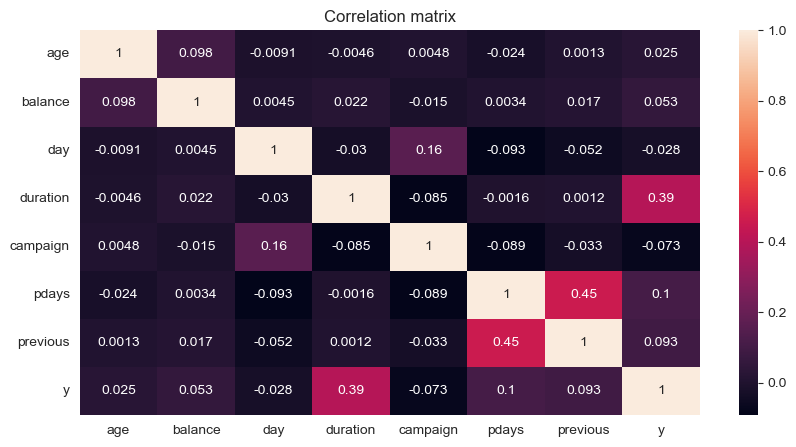

In [16]:
# Get the correlations of numerical columns
data_frame_corr = data_frame.copy()

# Encode the target variable using LabelEncoder
leEn = LabelEncoder()
data_frame_corr['y'] = leEn.fit_transform(data_frame_corr['y'])

num_data_frame = data_frame_corr.select_dtypes(include='int64')
correlation = num_data_frame.corr()
fig = plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True)
plt.title('Correlation matrix')
plt.show()

**According to the correlation matrix:**
* No any strong correlation between any features.

#### 3.7. Relationship between categorical columns and target variable

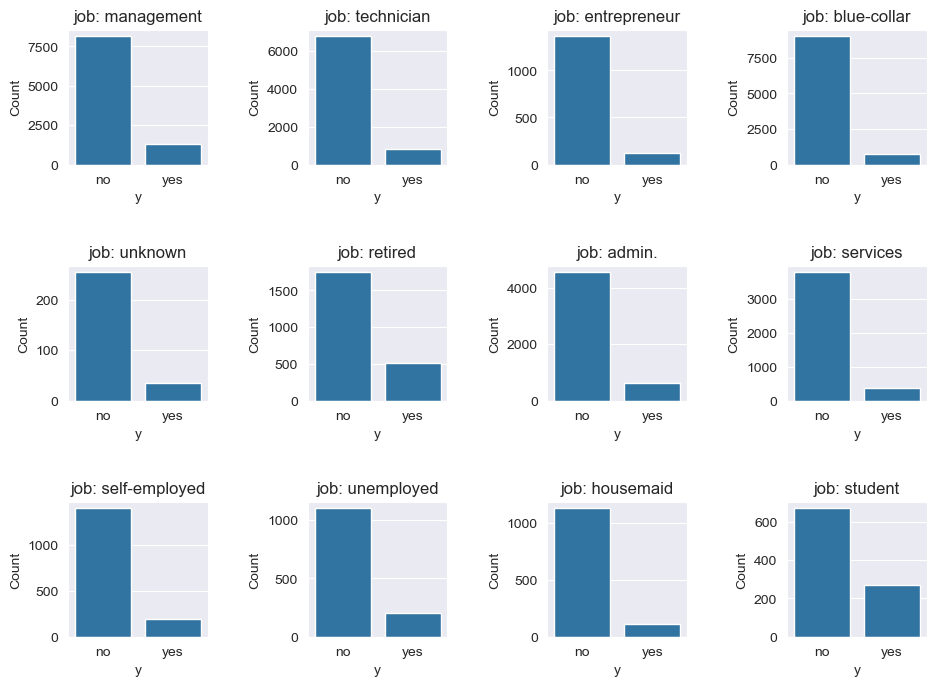

----------------------------------------------------------------------


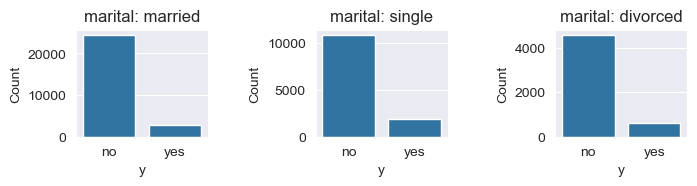

----------------------------------------------------------------------


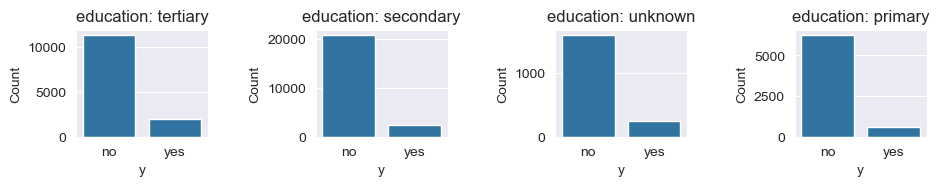

----------------------------------------------------------------------


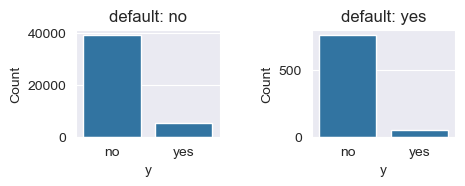

----------------------------------------------------------------------


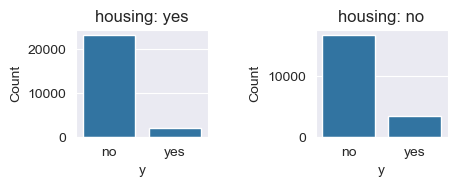

----------------------------------------------------------------------


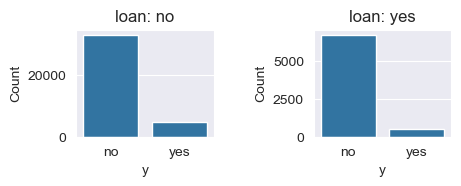

----------------------------------------------------------------------


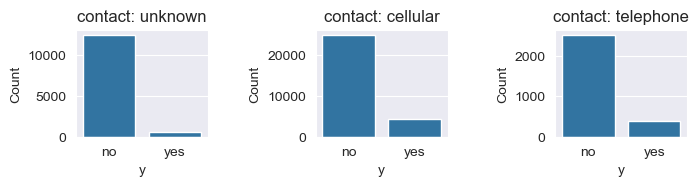

----------------------------------------------------------------------


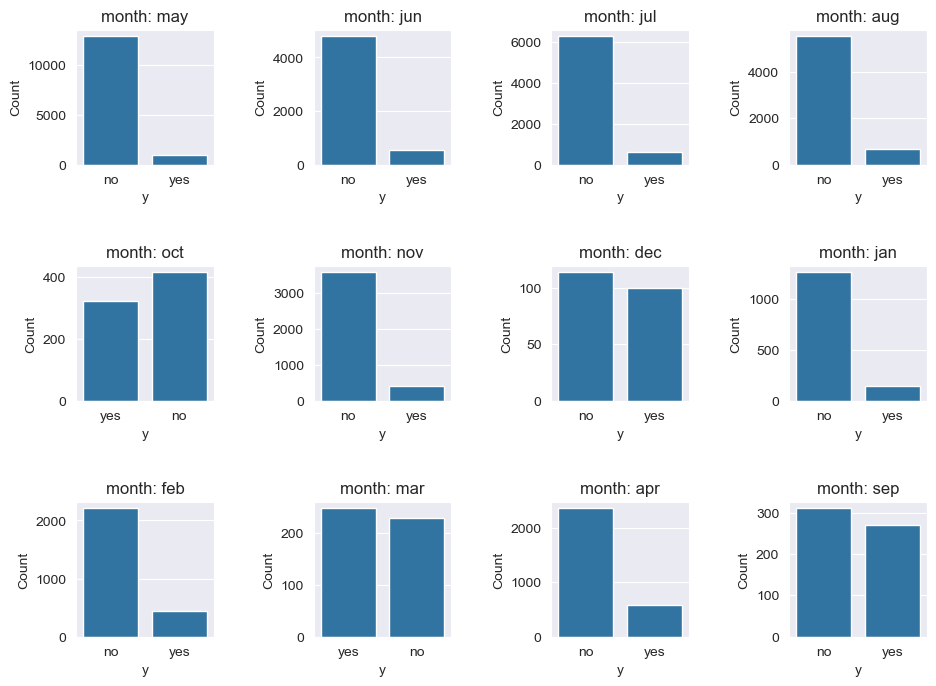

----------------------------------------------------------------------


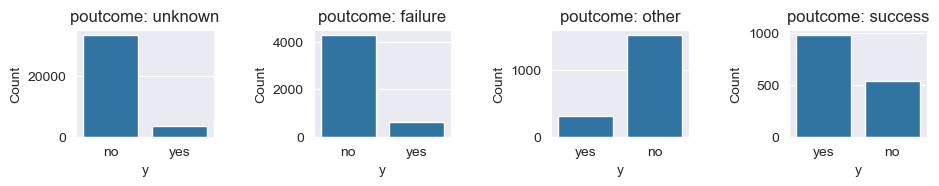

----------------------------------------------------------------------


In [17]:
# Get categorical columns without the target variable
categorical_columns = [col for col in categorical_columns if col != 'y']

# Loop through each categorical column
for column in categorical_columns:
    unique_values = data_frame[column].nunique()  # Count unique values in the column
    num_plots = unique_values  # Number of unique categories in this column
    rows = math.ceil(num_plots / 4)  
    # Calculate number of rows --> max 4

    fig, axes = plt.subplots(rows, 4, figsize=(10, rows * 2.5))  # Create grid --> subplot
    axes = axes.flatten()  # Flatten the 2D array of subplots

    for i, value in enumerate(data_frame[column].unique()):
        ax = axes[i]
        sns.countplot(x='y', data=data_frame[data_frame[column] == value], ax=ax)
        ax.set_title(f"{column}: {value}")
        ax.set_xlabel("y")
        ax.set_ylabel("Count")
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout(pad=3)  # Add spacing
    
    plt.show()

    # Space between categories
    print("----------------------------------------------------------------------")

#### 3.8. Examine the target variable

In [18]:
# Distribution of target variable --> y (subscribed deposit or not)
print(data_frame['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


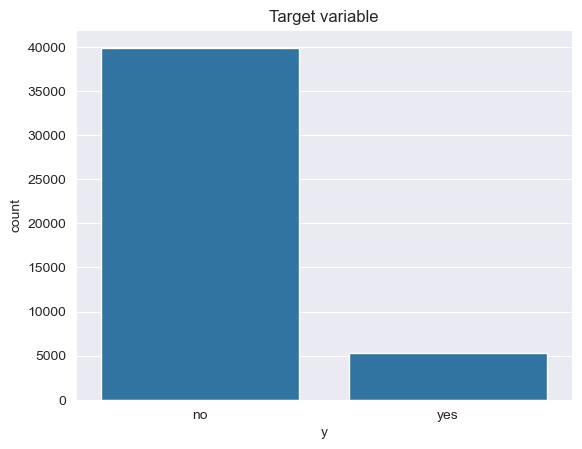

<Axes: ylabel='count'>

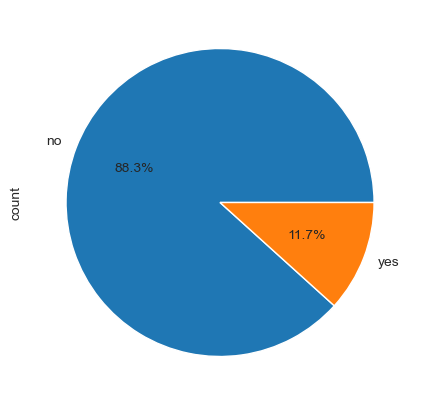

In [19]:
# Plot the distribution of the target variable
sns.countplot(x='y', data=data_frame)
plt.title('Target variable')
plt.show()

# Show pie plot 
plt.figure(figsize=(5,5))
data_frame['y'].value_counts().plot.pie(autopct='%1.1f%%')

* The target variable `y` is imbalanced.

### 4. Feature Engineering

**Selected features:**
* Numerical: `age`, `balance`, `duration`, `campaign`, `pdays`, `previous`, `day`
* Categorical: `job`, `marital`, `education`, `contact`, `month`, `poutcome`, `default`, `housing`, `loan`
* Target variable: `y`

#### 4.1. Selecting the features

In [20]:
# Group by 'y' and 'pdays' and get the size
grouped_data = data_frame.groupby(['y', 'pdays']).size().reset_index(name='count')

# Calculate the percentage
total_count = grouped_data['count'].sum()
grouped_data['percentage'] = (grouped_data['count'] / total_count) * 100

# Display the result
print(grouped_data)

       y  pdays  count  percentage
0     no     -1  33570   74.251841
1     no      1      9    0.019907
2     no      2     35    0.077415
3     no      3      1    0.002212
4     no      4      1    0.002212
..   ...    ...    ...         ...
909  yes    804      1    0.002212
910  yes    805      1    0.002212
911  yes    828      1    0.002212
912  yes    842      1    0.002212
913  yes    854      1    0.002212

[914 rows x 4 columns]


**According to the table:**
* The majority of the clients have not subscribed to a term deposit.
* 74.2518% of the clients have not been contacted before.

#### 4.1.1. Create a new binary feature 'contacted_before'

In [21]:
# Create a new binary feature 'contacted_before'
data_frame['contacted_before'] = data_frame['pdays'].apply(lambda x: 1 if x >= 0 else 0)

# Display the first few rows to verify the new feature
print(data_frame[['pdays', 'contacted_before']].head())

   pdays  contacted_before
0     -1                 0
1     -1                 0
2     -1                 0
3     -1                 0
4     -1                 0


In [22]:
# Drop the 'pdays' column
data_frame.drop(columns=['pdays'], inplace=True)

# Display the first few rows to confirm the column has been removed
data_frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,contacted_before
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no,0


#### 4.2. Detecting and handling outliers in numerical features

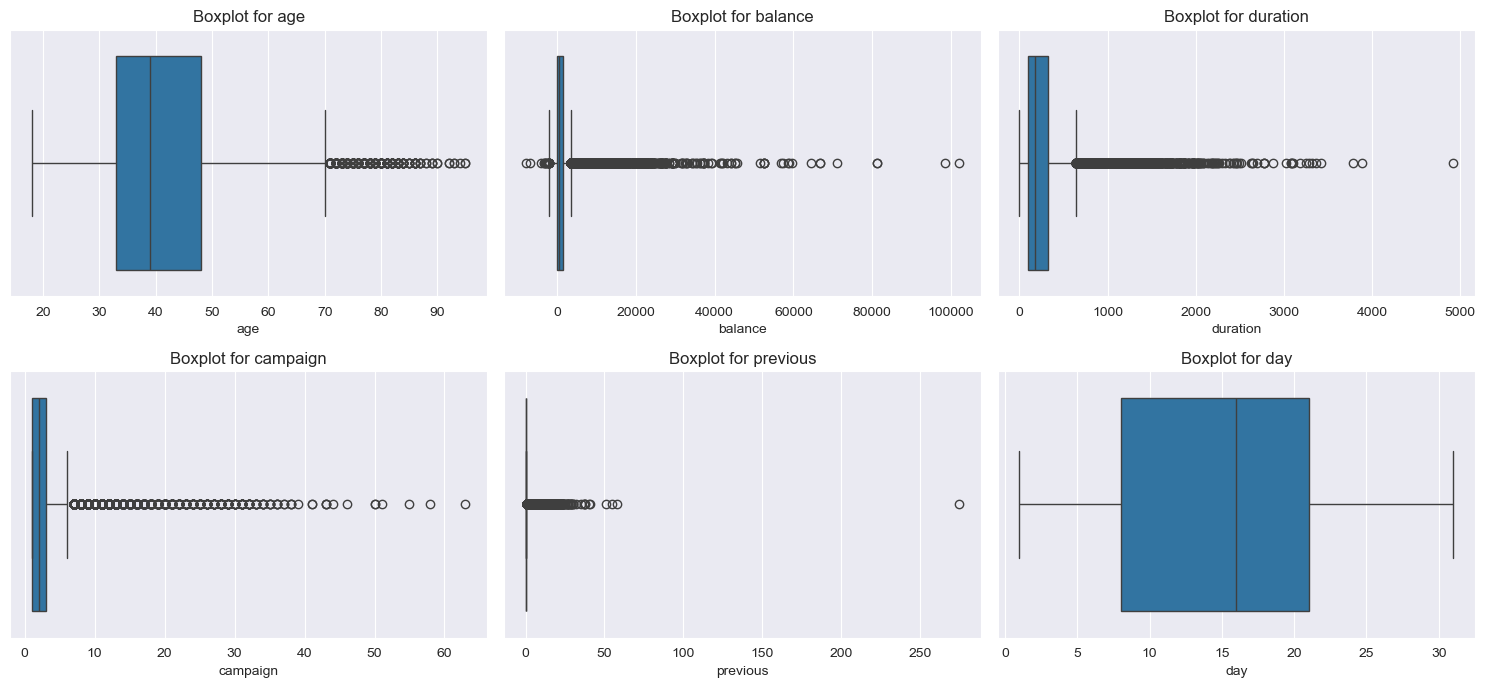

In [23]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'previous', 'day']

data_frame_1 = data_frame.copy()

# Box plots for all numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_frame_1[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

**According to the box plots:**
* `age`, `balance`, `duration`, `campaign`, `previous` columns have outliers.

**Handling outliers:**
* Method: Winsorization
* Winsorization --> A statistical technique that reduces the impact of outliers in data by replacing extreme values with values from a selected percentile range. (2020, GeeksforGeeks)

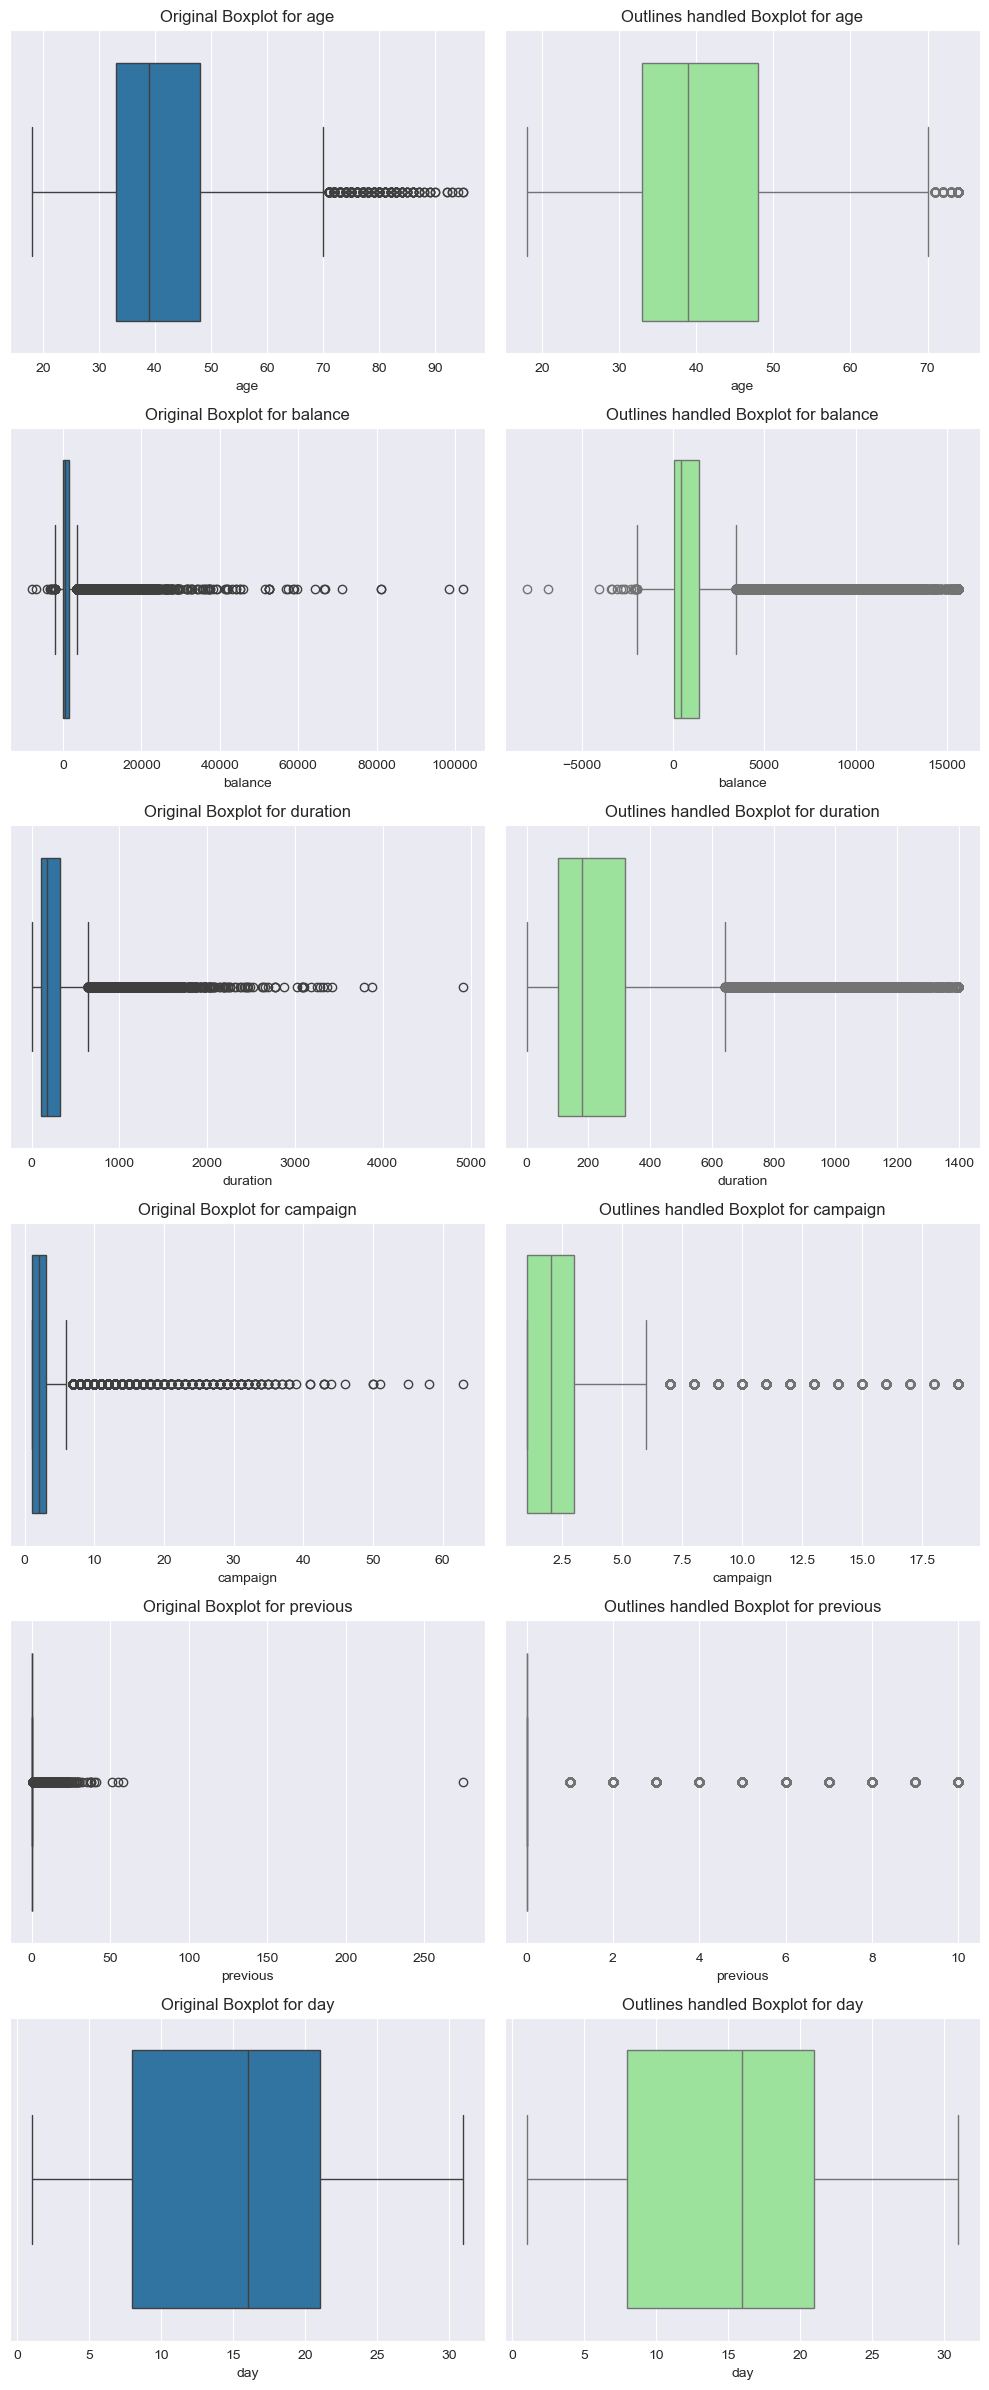

In [24]:
# Replacing extreme values method
# Method used --> Winsorization
def winsorization(column, lower_percentile = 0, upper_percentile = 99.3):
    lower_cutoff = np.percentile(column, lower_percentile)
    upper_cutoff = np.percentile(column, upper_percentile)
    return np.clip(column, lower_cutoff, upper_cutoff)

# Apply Winsorization to the numerical columns only
data_frame_2 = data_frame_1.copy()

for column_1 in numerical_columns:
    data_frame_2[column_1] = winsorization(data_frame_1[column_1])

# Plot box plots for each column in original and Winsorized DataFrames
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(10, 4 * len(numerical_columns)))

for i, column_1 in enumerate(numerical_columns):
    # Box plot without handling outliers
    sns.boxplot(data=data_frame_1, x=column_1, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original Boxplot for {column_1}")

    # Box plot after handling outliers
    sns.boxplot(data=data_frame_2, x=column_1, ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f"Outlines handled Boxplot for {column_1}")

# Layout
plt.tight_layout()
plt.show()

In [25]:
data_frame_1.describe()

,age,balance,day,duration,campaign,previous,contacted_before
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.580323,0.182633
std,10.618762,3044.765829,8.322476,257.527812,3.098021,2.303441,0.386369
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000,1.000000


In [26]:
data_frame_2.describe()

,age,balance,day,duration,campaign,previous,contacted_before
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.899029,1294.792485,15.806419,255.440402,2.717148,0.533675,0.182633
std,10.487190,2370.377173,8.322476,239.777066,2.728117,1.511743,0.386369
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000
max,74.000000,15632.590000,31.000000,1398.060000,19.000000,10.000000,1.000000


#### 4.1. Encoding categorical columns

In [27]:
for column in categorical_columns:
    print(column,len(data_frame_2[column].unique()))

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4


**Categorical columns:**
* Nominal:

`job`,`marital`,`education`,`contact`,`month`,`poutcome`

* Binary:

`default`,`housing`,`loan`,`y`

**Encoding:**
* Nominal columns will be one-hot encoded
* Binary columns will be label encoded

#### 4.2.1. Label encoding binary columns

In [28]:
data_frame_3 = data_frame_2.copy()

# Label encode binary columns
leEn = LabelEncoder()
label_encoded_col = ['y', 'loan', 'housing', 'default']
for column in label_encoded_col:
    data_frame_3[column] = leEn.fit_transform(data_frame_3[column])  # 'yes' -> 1, 'no' -> 0

#### 4.2.2. One-hot encoding nominal columns

In [29]:
# dummy encode categorical columns
categorical_columns_new = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
data_frame_3 = pd.get_dummies(data_frame_3, columns=categorical_columns_new, drop_first=False)

# Convert all boolean columns to 1 and 0
bool_columns = data_frame_3.select_dtypes(include='bool').columns
data_frame_3[bool_columns] = data_frame_3[bool_columns].astype(int)

# Check the head after encoding
data_frame_3.head()

,age,default,balance,housing,loan,day,duration,campaign,previous,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143.0,1,0,5,261.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29.0,1,0,5,151.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2.0,1,1,5,76.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506.0,1,0,5,92.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1.0,0,0,5,198.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


### 5. Random Forest Classification

#### 5.1. Split the dataset

In [30]:
# Split the dataset
X = data_frame_3.drop(columns=['y'])
Y = data_frame_3['y']

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
# Hyperparameters for Random Forest
rf_model = RandomForestClassifier(
    class_weight={0: 1, 1: 6},
    n_estimators= 300,
    random_state=42,
)

# Train the model
rf_model.fit(X_train_1, Y_train_1)

# Predict probabilities
y_prob_1 = rf_model.predict_proba(X_test_1)[:, 1]

# Adjust decision threshold
precision, recall, thresholds = precision_recall_curve(Y_test_1, y_prob_1)
optimal_threshold = thresholds[np.argmax(2 * precision * recall / (precision + recall))]
Y_pred_1 = (y_prob_1 >= optimal_threshold).astype(int)

print("\nClassification Report:")
print(classification_report(Y_test_1, Y_pred_1))

print("\nAccuracy Score:")
print(accuracy_score(Y_test_1, Y_pred_1))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7952
           1       0.54      0.76      0.63      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.84      0.78      9043
weighted avg       0.91      0.89      0.90      9043


Accuracy Score:
0.8924029636182683


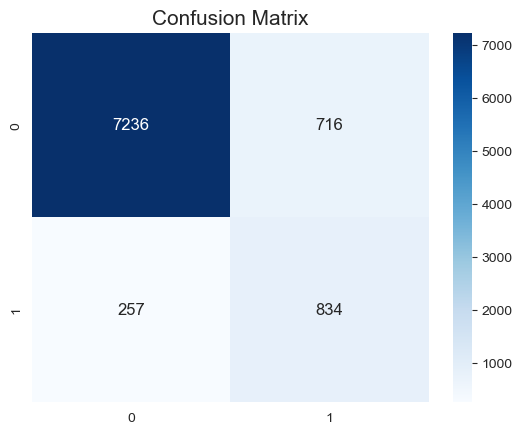

In [32]:
# confusion matrix rf
cm_rf = confusion_matrix(Y_test_1, Y_pred_1)
sns.heatmap(cm_rf, annot=True, fmt='d', annot_kws={"size": 12}, cmap='Blues')
plt.title('Confusion Matrix', size=15)
plt.show()

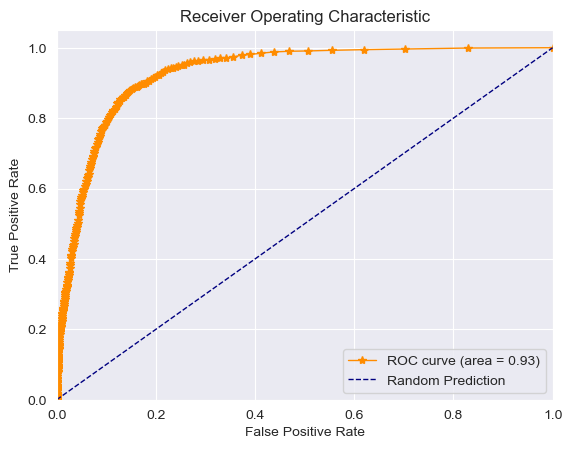

In [33]:
# Calculate ROC curve and AUC for Random Forest model
fpr_rf, tpr_rf, _ = roc_curve(Y_test_1, y_prob_1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=1, linestyle='-', marker='*', label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Prediction')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [34]:
# Apply additional preprocessing neural network data
# MinMaxScaler
scaler = MinMaxScaler()
data_frame_4 = data_frame_3.copy()  # Avoid modifying the original dataset

# Apply scaling to numerical features
numerical_columns = ['balance', 'duration', 'campaign', 'previous']
data_frame_4[numerical_columns] = scaler.fit_transform(data_frame_4[numerical_columns])

# get description of the dataset for numerical columns
data_frame_4[numerical_columns].describe()

,balance,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.393791,0.182711,0.095397,0.053368
std,0.100221,0.171507,0.151562,0.151174
min,0.000000,0.000000,0.000000,0.000000
25%,0.342091,0.073674,0.000000,0.000000
50%,0.357989,0.128750,0.055556,0.000000
75%,0.399423,0.228173,0.111111,0.000000
max,1.000000,1.000000,1.000000,1.000000


### 6. Neural Network Classification

In [35]:
# Split the dataset
X = data_frame_4.drop(columns=['y'])
Y = data_frame_4['y']

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
# Apply SMOTE oversampling
smote_tomek = SMOTETomek(random_state=42)
X_train_2, Y_train_2 = smote_tomek.fit_resample(X_train_2, Y_train_2)

In [37]:
# Input parameters
input_dim = X_train_2.shape[1]  # Number of features
units_1 = 100 # Number of neurons in the first layer
activation_1 = 'relu'  # Activation function
weight_initializer = 'random_uniform'  # Weight initialization method

# Creating keras classifier neural networks Dense (Fully connected)
nn_model = Sequential()
# Input layer
nn_model.add(Input(shape=(input_dim,)))
# First hidden layer
nn_model.add(Dense(units=units_1, activation=activation_1, kernel_initializer=weight_initializer))
# Second hidden layer
nn_model.add(Dense(units=units_1, activation=activation_1, kernel_initializer=weight_initializer))
# Third hidden layer
nn_model.add(Dense(units=units_1, activation=activation_1, kernel_initializer=weight_initializer))

# Neural networks output params
units_2 = 1  # Binary output decision
activation_2 = 'sigmoid'  # Activation function of binary classification

# Output layer
nn_model.add(Dense(units=units_2, activation=activation_2))

In [38]:
# optimizer model params 
NN_optimizer = 'adam' # function of weights adjust
loss = 'binary_crossentropy' # loss function, error evaluate
metrics = 'binary_accuracy' # evaluate metric
nn_model.compile(optimizer = NN_optimizer , loss = loss , metrics = [metrics])

In [39]:
# training model
nn_model.fit(X_train_2 , Y_train_2 , batch_size = 5 , epochs = 10)

# Get the accuracy of the model
_, accuracy = nn_model.evaluate(X_train_2, Y_train_2)
print('Neural Network Accuracy: ',round(accuracy , 3)*100,'%')

Epoch 1/10
12769/12769 ━━━━━━━━━━━━━━━━━━━━ 10s 708us/step - binary_accuracy: 0.8747 - loss: 0.2796
Epoch 2/10
12769/12769 ━━━━━━━━━━━━━━━━━━━━ 9s 706us/step - binary_accuracy: 0.9298 - loss: 0.1685
Epoch 3/10
12769/12769 ━━━━━━━━━━━━━━━━━━━━ 9s 731us/step - binary_accuracy: 0.9316 - loss: 0.1600
Epoch 4/10
12769/12769 ━━━━━━━━━━━━━━━━━━━━ 10s 764us/step - binary_accuracy: 0.9336 - loss: 0.1545
Epoch 5/10
12769/12769 ━━━━━━━━━━━━━━━━━━━━ 10s 769us/step - binary_accuracy: 0.9350 - loss: 0.1508
Epoch 6/10
12769/12769 ━━━━━━━━━━━━━━━━━━━━ 9s 672us/step - binary_accuracy: 0.9358 - loss: 0.1459
Epoch 7/10
12769/12769 ━━━━━━━━━━━━━━━━━━━━ 10s 791us/step - binary_accuracy: 0.9347 - loss: 0.1464
Epoch 8/10
12769/12769 ━━━━━━━━━━━━━━━━━━━━ 9s 712us/step - binary_accuracy: 0.9382 - loss: 0.1382
Epoch 9/10
12769/12769 ━━━━━━━━━━━━━━━━━━━━ 10s 791us/step - binary_accuracy: 0.9381 - loss: 0.1430
Epoch 10/10
12769/12769 ━━━━━━━━━━━━━━━━━━━━ 10s 806us/step - binary_accuracy: 0.9382 - loss: 0.1407
199

In [40]:
# Make predictions on the test set
Y_pred_nn = nn_model.predict(X_test_2)
Y_pred_nn = (Y_pred_nn >= 0.5).astype(int)  # Convert probabilities to binary predictions

print("\nClassification Report:")
print(classification_report(Y_test_2, Y_pred_nn))

print("\nAccuracy Score:")
print(accuracy_score(Y_test_2, Y_pred_nn))

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7952
           1       0.58      0.59      0.59      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.77      0.76      9043
weighted avg       0.90      0.90      0.90      9043


Accuracy Score:
0.8987061815769103


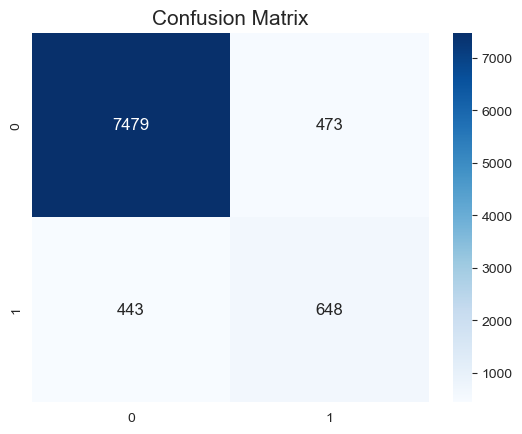

In [41]:
# confusion matrix
cm_nn = confusion_matrix(Y_test_2 , Y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', annot_kws={"size": 12}, cmap='Blues')
plt.title('Confusion Matrix' , size = 15)
plt.show()

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step


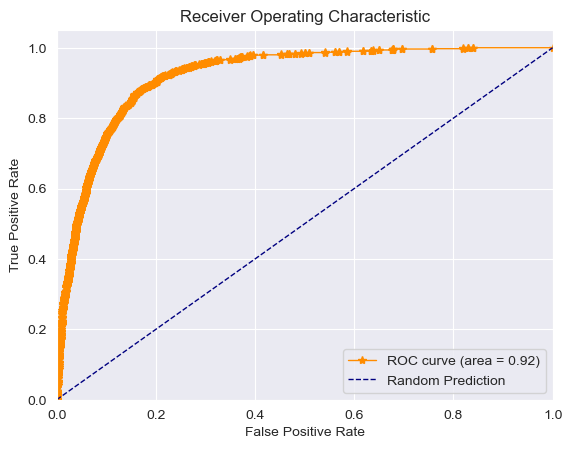

In [42]:
# Calculate probabilities for the positive class in nn
Y_pred_proba_nn = nn_model.predict(X_test_2).ravel()

# Calculate ROC curve For the NN
fpr_nn, tpr_nn, thresholds = roc_curve(Y_test_2, Y_pred_proba_nn)
roc_auc = auc(fpr_nn, tpr_nn)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=1, linestyle='-', marker='*', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Prediction')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Comparison of Random Forest and Neural Network Models

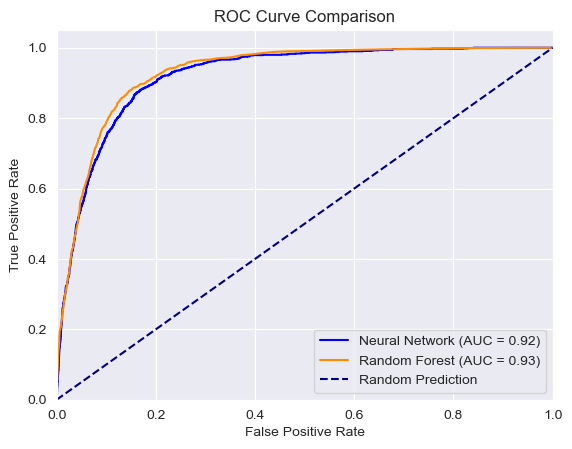

In [43]:
# ROC curves for both models
fpr_nn, tpr_nn, _ = roc_curve(Y_test_2, Y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)
fpr_rf, tpr_rf, _ = roc_curve(Y_test_1, y_prob_1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_nn, tpr_nn, color='blue', linestyle='-', label='Neural Network (AUC = %0.2f)' % roc_auc_nn)
plt.plot(fpr_rf, tpr_rf, color='darkorange', linestyle='-', label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Prediction')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


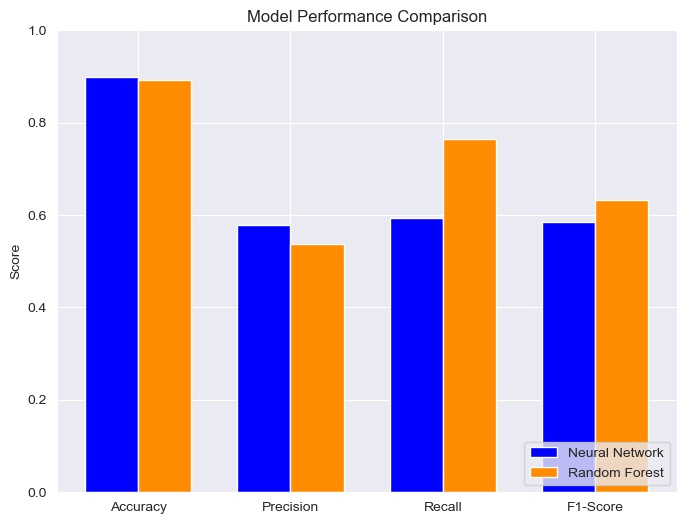

In [44]:
# Metrics for Neural Network
accuracy_nn = accuracy_score(Y_test_2, Y_pred_nn)
precision_nn = precision_score(Y_test_2, Y_pred_nn)
recall_nn = recall_score(Y_test_2, Y_pred_nn)
f1_nn = f1_score(Y_test_2, Y_pred_nn)

# Metrics for Random Forest
accuracy_rf = accuracy_score(Y_test_1, Y_pred_1)
precision_rf = precision_score(Y_test_1, Y_pred_1)
recall_rf = recall_score(Y_test_1, Y_pred_1)
f1_rf = f1_score(Y_test_1, Y_pred_1)

# Data for Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nn_scores = [accuracy_nn, precision_nn, recall_nn, f1_nn]
rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, nn_scores, width, label='Neural Network', color='blue')
plt.bar(x + width/2, rf_scores, width, label='Random Forest', color='darkorange')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend(loc="lower right")
plt.show()
